# HW4

## GENERALIZATION ERROR

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

### NOTES

- d<sub>vc</sub> = VC dimension, highest number of points shatterable by hypothesis set H (m<sub>H</sub>(N) = 2<sup>N</sup>
- &delta; = 4 * m<sub>H</sub>(2N) e<sup>(-N/8)&epsilon;<sup>2</sup></sup>
&rArr; ln(&delta;/4) - ln(m<sub>H</sub>(2N)) = (-N/8) * &epsilon;<sup>2</sup> 
&rArr; (8/N) * (ln (m<sub>H</sub>(2N)) - ln(&delta;/4)) = &epsilon;<sup>2</sup>
- For N &gt; d<sub>vc</sub>, use simple approximation m<sub>H</sub>(N) &asymp; N<sup>d<sub>vc</sub></sup>
&rArr; (8/N) * (ln ((2N)<sup>d<sub>vc</sub></sup>) - ln(&delta;/4)) = &epsilon;<sup>2</sup>
&rArr; (8/N) * ((d<sub>vc</sub> * ln(2N)) - ln(&delta;/4)) = &epsilon;<sup>2</sup>

Given d<sub>vc</sub> = 10, &delta; = 0.05 (95% confidence), here are some N and epsilon. Note that N = 460,000 yields an epsilon &le; 0.05. 

In [9]:
def vc_eps(delta, N, dvc):
    return math.sqrt((8.0/N)*((dvc*math.log(2.0*N))-math.log(delta/4.0)))

prob1_N = [400000,420000,440000, 460000, 480000]
prob1_delta = 0.05
prob1_dvc = 10

for cur_N in prob1_N:
    cur_eps = vc_eps(prob1_delta, cur_N, prob1_dvc)
    print("N = %d : epsilon = %f" % (cur_N, cur_eps))

N = 400000 : epsilon = 0.052973
N = 420000 : epsilon = 0.051786
N = 440000 : epsilon = 0.050679
N = 460000 : epsilon = 0.049643
N = 480000 : epsilon = 0.048670


Now we wish to compare bounds on generalization error &epsilon; holding with probability 1 - &delta;. We wish to compare the original VC bound, Rademacher penalty bound, Parrondo and Van den Broek bound, and Devroye bound on d<sub>vc</sub> = 50 and &delta; = 0.05.

- Rademacher: &epsilon; &le; sqrt((2/N) * ln(2*N*m<sub>H</sub>(N))) + sqrt((2/N)*ln(1/delta)) + (1/N)
- Note that Parrondo and Devroye are **IMPLICIT** bounds and thus N cannot be separated from &epsilon; . Thus a possible solution is to test many &epsilon;s starting from 0 and return the one before the break point (where the inequality fails)


From the following plot, we can see that the Devroye bound is the lowest for large N.

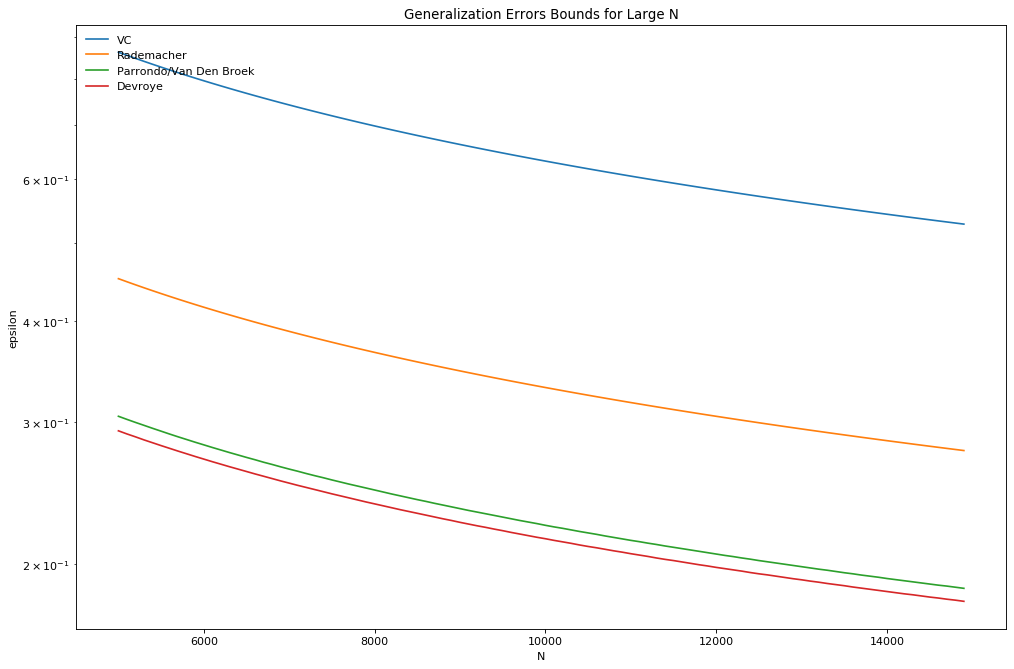

In [10]:
def vc_mapper(N):
    return vc_eps(0.05, N, 50)

vc_vec = np.vectorize(vc_mapper)

def rademacher_eps(delta, N, dvc):
    cur_eps = math.sqrt((2.0/N)*(math.log(2.0*N)+(dvc*math.log(N)))) + math.sqrt((2.0/N) * math.log(1.0/delta)) + (1.0/N)
    return cur_eps

def rademacher_mapper(N):
    return rademacher_eps(0.05, N, 50)

rademacher_vec = np.vectorize(rademacher_mapper)

eps_range = np.arange(0.0,10, 0.0001)

def parrondo_eps(delta, N, dvc):
    last_true = False
    last_eps = eps_range[0]
    for cur_eps in eps_range:
        cur_rightside = (1.0/N) * ((2.0*cur_eps) + math.log(6.0/delta) + (dvc*math.log(2.0*N)))
        cur_rightside = math.sqrt(cur_rightside)
        cur_true = cur_eps <= cur_rightside
        if cur_true == False and last_true == True:
            break
        elif cur_true == True:
            last_true = True
            last_eps = cur_eps
    return last_eps

def parrondo_mapper(N):
    return parrondo_eps(0.05, N, 50)

parrondo_vec = np.vectorize(parrondo_mapper)

def devroye_eps(delta, N, dvc):
    last_true = False
    last_eps = eps_range[0]
    for cur_eps in eps_range:
        cur_rightside = (1.0/(2.0*N))*(((4.0*cur_eps)*(1.0+cur_eps)) + math.log(4.0/delta) + ((2.0*dvc)*math.log(N)))
        cur_rightside = math.sqrt(cur_rightside)
        cur_true = cur_eps <= cur_rightside
        if cur_true == False and last_true == True:
            break
        elif cur_true == True:
            last_true = True
            last_eps = cur_eps
    return last_eps

def devroye_mapper(N):
    return devroye_eps(0.05, N, 50)

devroye_vec = np.vectorize(devroye_mapper)

prob2 = {}
prob2["N"] = np.arange(5000,15000, 100)
prob2["vc"] = vc_vec(prob2["N"])
prob2["rad"] = rademacher_vec(prob2["N"])
prob2["par"] = parrondo_vec(prob2["N"])
prob2["dev"] = devroye_vec(prob2["N"])

prob2["plot"] = plt.figure(figsize=(15,10), dpi=80)
prob2["ax"] = prob2["plot"].add_subplot(111)
prob2["ax"].set_title("Generalization Errors Bounds for Large N")
prob2["ax"].set_xlabel("N")
prob2["ax"].set_ylabel("epsilon")
prob2["ax"].set_yscale("log", basey=10)


prob2["ax"].plot(prob2["N"], prob2["vc"], label="VC")
prob2["ax"].plot(prob2["N"], prob2["rad"], label="Rademacher")
prob2["ax"].plot(prob2["N"], prob2["par"], label="Parrondo/Van Den Broek")
prob2["ax"].plot(prob2["N"], prob2["dev"], label = "Devroye")

prob2["ax"].legend(loc='upper left', frameon=False)

plt.show()

From the following plot, we can see that the Parrondo/Van den Broek bound yields the lowest bounds for small N.

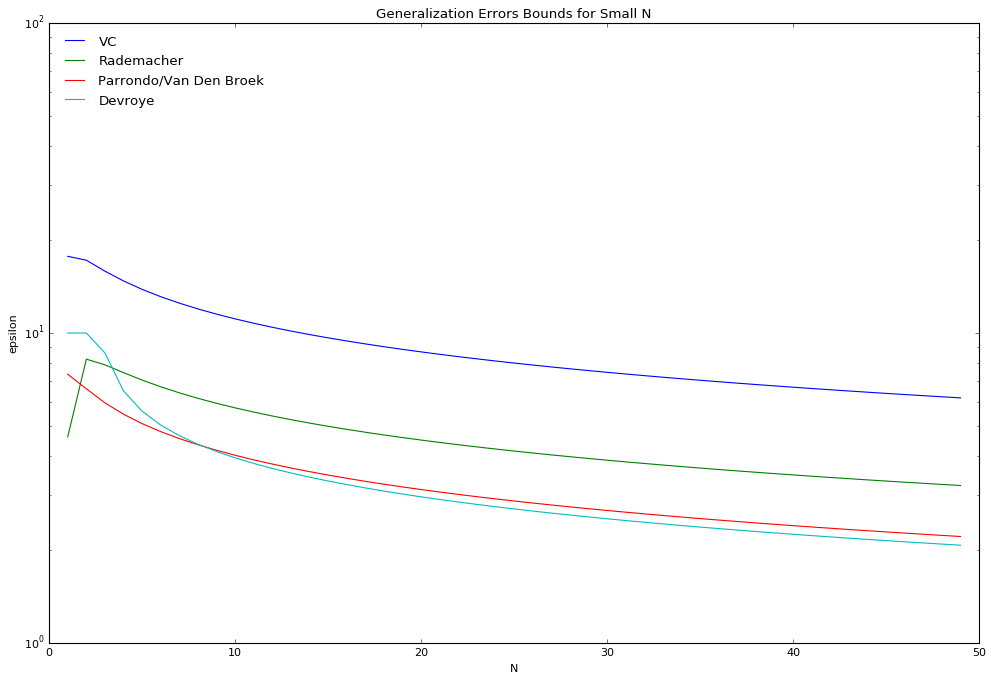

In [32]:
prob3 = {}
prob3["N"] = np.arange(1,50, 1)
prob3["vc"] = vc_vec(prob3["N"])
prob3["rad"] = rademacher_vec(prob3["N"])
prob3["par"] = parrondo_vec(prob3["N"])
prob3["dev"] = devroye_vec(prob3["N"])

prob3["plot"] = plt.figure(figsize=(15,10), dpi=80)
prob3["ax"] = prob3["plot"].add_subplot(111)
prob3["ax"].set_title("Generalization Errors Bounds for Small N")
prob3["ax"].set_xlabel("N")
prob3["ax"].set_ylabel("epsilon")
prob3["ax"].set_yscale("log", basey=10)


prob3["ax"].plot(prob3["N"], prob3["vc"], label="VC")
prob3["ax"].plot(prob3["N"], prob3["rad"], label="Rademacher")
prob3["ax"].plot(prob3["N"], prob3["par"], label="Parrondo/Van Den Broek")
prob3["ax"].plot(prob3["N"], prob3["dev"], label = "Devroye")

prob3["ax"].legend(loc='upper left', frameon=False)

plt.show()

## BIAS AND VARIANCE

Given target function f : [-1, 1] &rarr; &reals; given by f(x) = sin(&pi;x) with input probability distribution uniform on [-1,1], training set with 2 examples &isin; [-1, 1] picked independently, hypothesis picked by learning algorithm that minimizes the squared error.


**Given :** hypothesis h(x) = ax.

**Want :** Expected value of h(x) (g-bar(x)), bias, variance.
- Note that g-bar(x) &approx; (1/K) * &sum; (k=1; K) g<sup>&Dscr;<sub>K</sub></sup>(x)


**Idea :** Use linear regression w = X<sup>&#10013;</sup>y for learning algorithm, where X and y are 2 x 1 matrices.

In [72]:
#number of x value pairs (2 training examples per set)
bv_numpairs = 10000
bv_shape = (bv_numpairs, 2)
bv_hyp = lambda x: math.sin(math.pi * x)
bv_hyp_vec = np.vectorize(bv_hyp)

#generate a bunch of 2 elt data sets (transposed) in one fell swoop
bv_xpairs = np.random.uniform(-1,1,(bv_numpairs,1, 2))
bv_labels = bv_hyp_vec(bv_xpairs) #get their labels

#for later use
bv_xaxis = np.arange(-1,1,0.001) #dividing up the [-1,1] interval in chunks
bv_xn = bv_xaxis.shape[0]
bv_yaxis = bv_hyp_vec(bv_xaxis) #finding their corresponding sin vals

#init hypothesis array, the hypothesis h(x)=ax will be bv_h[1]
#also go ahead and init the entries "w" and "w_avg" where "w" will carry the weights of each hypothesis
bv_h = [{"w": np.array([]), "var_vals": np.array([]), "w_avg": 0, "idx": x} for x in range(5)]

In [73]:
#do training for each 2 elt data set
for i in range(bv_numpairs):
    cur_data = bv_xpairs[i].T
    cur_data_pinv = np.linalg.pinv(cur_data)
    cur_labels = bv_labels[i].T
    cur_w = np.dot(cur_data_pinv, cur_labels).flatten()
    bv_h[1]["w"] = np.concatenate((bv_h[1]["w"],cur_w),0)

#average out
bv_h[1]["w_avg"] = np.average(bv_h[1]["w"])

#find the bias
bv_h[1]["gb_x"] = np.multiply(bv_h[1]["w_avg"],bv_xaxis) #finding where they fall on g-bar(x)=(a_avg)*x
bv_h[1]["bias_avg"] = np.average(np.square(np.subtract(bv_h[1]["gb_x"],bv_yaxis))) #finding (1/N)*sum(g-bar(x)-sin(pi*x))^2

#find the variance
#for each data set, need to find expected value E(dataset)[(g(dataset,x)-g-bar(x))^2]

'''
for i in range(bv_numpairs):
    #for current data set, find g(x)
    cur_gx = np.multiply(bv_h[1]["w"][i], bv_xpairs[i])
    #subtract and square from corresponding gbar
    cur_gbx = np.multiply(bv_h[1]["w_avg"], bv_xpairs[i])
    cur_gdiff = np.square(np.subtract(cur_gx, cur_gbx))
    #for expected value, find average
    cur_var = np.average(cur_gdiff)
    bv_h[1]["var_vals"] = np.concatenate((bv_h[1]["var_vals"],[cur_var]))
    
'''

bv_h[1]["gx"] = np.multiply(np.reshape(bv_h[1]["w"], (bv_numpairs, 1)), np.reshape(bv_xpairs, (bv_numpairs, 2)))
bv_h[1]["gbx"] = np.multiply(bv_h[1]["w_avg"], np.reshape(bv_xpairs, (bv_numpairs, 2)))
bv_h[1]["var_vals"] = np.average(np.square(np.subtract(bv_h[1]["gx"], bv_h[1]["gbx"])),axis = 1)
#now find average variance
bv_h[1]["var_avg"] = np.average(bv_h[1]["var_vals"])


print("The average hypothesis of form g_bar(x) = ax is given by a = %f" % bv_h[1]["w_avg"])
print("The average bias is %f" % bv_h[1]["bias_avg"])
print("The average variance is %f" % bv_h[1]["var_avg"])

The average hypothesis of form g_bar(x) = ax is given by a = 1.427259
The average bias is 0.270402
The average variance is 0.205802


Now we want to find the least out-of-sample expected errors from multiple hypotheses (including the one we just did). The hypotheses include:
0. h(x) = b
1. h(x) = ax
2. h(x) = ax + b
3. h(x) = ax<sup>2</sup>
4. h(x) = ax<sup>2</sup> + b


The process for training can go much the same as before, modeling our process over the linear regression example, choosing our weights to represent the unknowns a and b, and squaring the variable x when necessary.


In [74]:
#for calculation of e_out, just compare against bv_xaxis and bv_yaxis

#h[0]===========================================================================

#training for the h(x) = b is interesting in that to minimize mean squared error,
#you basically want to split the diff between the two points
bv_h[0]["w"] = np.average(bv_labels, axis=2)
bv_h[0]["w_avg"] = np.average(bv_h[0]["w"])

#bias and variance
bv_h[0]["bias_avg"] = np.average(np.square(np.subtract(bv_h[0]["w_avg"], bv_yaxis)))
                                    
bv_h[0]["var_avg"] = np.average(np.square(np.subtract(bv_h[0]["w"], bv_h[0]["w_avg"])))


#h[2]============================================================================
                                    
#with h[2], each 2-example training set needs an extra dim x0=1 for each example
#w holds [a,b] values for h(x) = ax + b
#do training for each 2 elt data set
for i in range(bv_numpairs):
    cur_data = bv_xpairs[i].T
    cur_num = cur_data.shape[0] #number of examples
    cur_data = np.c_[np.ones(cur_num), cur_data]
    cur_data_pinv = np.linalg.pinv(cur_data)
    cur_labels = bv_labels[i].T
    cur_w = np.dot(cur_data_pinv, cur_labels).flatten()
    bv_h[2]["w"] = np.concatenate((bv_h[2]["w"],cur_w))
bv_h[2]["w"] = np.reshape(bv_h[2]["w"], bv_shape)
bv_h[2]["w_avg"] = np.reshape(np.average(bv_h[2]["w"], axis=0), (1,2))

#bias and variance
bv_h[2]["bias_avg"] = np.average(np.square(np.subtract(bv_yaxis, np.dot(bv_h[2]["w_avg"], np.c_[np.ones(bv_xn), bv_xaxis].T))))                             

#find the variance
#for each data set, need to find expected value E(dataset)[(g(dataset,x)-g-bar(x))^2]
for i in range(bv_numpairs):
    #for current data set, find g(x)
    cur_pairs = bv_xpairs[i].T
    cur_pairs_mtx = np.c_[np.ones(cur_pairs.shape[0]), cur_pairs].T
    cur_w = bv_h[2]["w"][i]
    cur_w = np.reshape(cur_w, (1, 2))
    cur_gx = np.dot(cur_w, cur_pairs_mtx)
    #subtract and square from corresponding gbar
    cur_gbx = np.multiply(bv_h[2]["w_avg"], cur_pairs_mtx)
    cur_gdiff = np.square(np.subtract(cur_gx, cur_gbx))
    #for expected value, find average
    cur_var = np.average(cur_gdiff)
    bv_h[2]["var_vals"] = np.concatenate((bv_h[2]["var_vals"],[cur_var]))

bv_h[2]["var_avg"] = np.average(bv_h[2]["var_vals"])
    
#h[3]===================================================================
    
                                    
#h(x) = ax^2
#do training, similar to h[1] case (h(x) = ax) except squaring entries
for i in range(bv_numpairs):
    cur_data = np.square(bv_xpairs[i].T)
    cur_data_pinv = np.linalg.pinv(cur_data)
    cur_labels = bv_labels[i].T
    cur_w = np.dot(cur_data_pinv, cur_labels).flatten()
    bv_h[3]["w"] = np.concatenate((bv_h[3]["w"],cur_w),0)
bv_h[3]["w_avg"] = np.average(bv_h[3]["w"])

#bias and variance
bv_h[3]["bias_avg"] = np.average(np.square(np.subtract(bv_yaxis, np.multiply(bv_h[3]["w_avg"], np.square(bv_xaxis)))))

bv_h[3]["gx"] = np.multiply(np.reshape(bv_h[3]["w"], (bv_numpairs, 1)), np.reshape(np.square(bv_xpairs), (bv_numpairs, 2)))
bv_h[3]["gbx"] = np.multiply(bv_h[3]["w_avg"], np.reshape(np.square(bv_xpairs), (bv_numpairs, 2)))
bv_h[3]["var_vals"] = np.average(np.square(np.subtract(bv_h[3]["gx"], bv_h[3]["gbx"])),axis = 1)
#now find average variance
bv_h[3]["var_avg"] = np.average(bv_h[3]["var_vals"])

#h[4]=========================================================================
#h(x) = ax^2 + b
#training similar to h3 case with the extra dim x0=1 but squaring x like in h4
for i in range(bv_numpairs):
    cur_data = bv_xpairs[i].T
    cur_num = cur_data.shape[0] #number of examples
    cur_data = np.c_[np.ones(cur_num), np.square(cur_data)]
    cur_data_pinv = np.linalg.pinv(cur_data)
    cur_labels = bv_labels[i].T
    cur_w = np.dot(cur_data_pinv, cur_labels).flatten()
    bv_h[4]["w"] = np.concatenate((bv_h[4]["w"],cur_w))
    
bv_h[4]["w"] = np.reshape(bv_h[4]["w"], bv_shape)
bv_h[4]["w_avg"] = np.average(bv_h[4]["w"], axis=0)

#bias and variance
bv_h[4]["bias_avg"] = np.average(np.square(np.subtract(bv_yaxis, np.dot(bv_h[4]["w_avg"], np.c_[np.ones(bv_xn), np.square(bv_xaxis)].T))))                             

#find the variance
#for each data set, need to find expected value E(dataset)[(g(dataset,x)-g-bar(x))^2]
for i in range(bv_numpairs):
    #for current data set, find g(x)
    cur_pairs = bv_xpairs[i].T
    cur_pairs_mtx = np.c_[np.ones(cur_pairs.shape[0]), np.square(cur_pairs)].T
    cur_w = bv_h[4]["w"][i]
    cur_w = np.reshape(cur_w, (1, 2))
    cur_gx = np.dot(cur_w, cur_pairs_mtx)
    #subtract and square from corresponding gbar
    cur_gbx = np.multiply(bv_h[4]["w_avg"], cur_pairs_mtx)
    cur_gdiff = np.square(np.subtract(cur_gx, cur_gbx))
    #for expected value, find average
    cur_var = np.average(cur_gdiff)
    bv_h[4]["var_vals"] = np.concatenate((bv_h[1]["var_vals"],[cur_var]))

bv_h[4]["var_avg"] = np.average(bv_h[1]["var_vals"])
    


for hyp in bv_h:
    print("The expected value of e_out for hypothesis %d is %f" % (hyp["idx"], hyp["bias_avg"] + hyp["var_avg"]))

The expected value of e_out for hypothesis 0 is 0.748100
The expected value of e_out for hypothesis 1 is 0.476204
The expected value of e_out for hypothesis 2 is 0.779530
The expected value of e_out for hypothesis 3 is 0.759747
The expected value of e_out for hypothesis 4 is 1.062782


## VC DIMENSION

### PROBLEM 8
Given q &isin; &integers; &niv; q &ge; 1  and m<sub>H</sub>(1) = 2.

**Want :** d<sub>VC</sub> of a hypothesis set with growth function m<sub>H</sub>(N+1) = 2*m<sub>H</sub>(N) - NCq. Note that MCm = 0 when m &gt; M.


For q &gt; N, NCq = 0, so until we reach the necessary N, n<sub>H</sub>(N+1) = 2*m<sub>H</sub>(N) and since for N = 1, m<sub>H</sub>(N) = 2 = 2<sup>1</sup>, m<sub>H</sub>(N) = 2<sup>N</sup> for N &le; q. NCq becomes non-zero in construction of m<sub>H</sub>(q+1) = 2*M<sub>H</sub>(q) - qCq (since qCq = 1), and so since M<sub>H</sub>(q+1) < 2<sup>q+1</sup>, q+1 is the break point and q is the VC dimension.

### PROBLEM 9

**Want :** The VC dimension bound for the intersection of hypothesis sets H<sub>1</sub>,...,H<sub>K</sub> with finite positive VC dimensions d<sub>VC</sub>(H<sub>k</sub>).



Since we are dealing with the **intersection** we are dealing with the hypotheses **common** to all hypothesis sets. Let's consider the hypothesis set with lowest VC dimension H<sub>low</sub>, with d<sub>VC</sub> = d<sub>low</sub>. Since **any** hypothesis from H<sub>low</sub> can at most shatter d<sub>low</sub> points and the intersection between all these hypothesis sets must be subset of all these hypothesis sets, at most the intersection can shatter is d<sub>low</sub> points and thus 0 &le; d<sub>VC</sub>(&Intersection; (k=1; K) H<sub>k</sub>) &le; min (k=1;K){d<sub>VC</sub>(H<sub>k</sub>)}


### PROBLEM 10

Now consider the hypothesis sets as before but their **union** instead of intersection. Since instead of the intersection being the subsets of all involved sets as before we are dealing with the union, we can consider every hypothesis set as being a subset of the union. Thus in the union we have in our possession the hypothesis set with the highest VC dimension aka max (k=1;K) {d<sub>VC</sub> (H<sub>k</sub>)}. Thus this value must be the lower bound for the VC dimension of the union.


The upper bound can be more than the summation of each hypothesis set's VC dimension (&sum; (k=1;K){d<sub>VC</sub>(H<sub>k</sub>)}). Consider two hypothesis sets H1 and H2, both with cardinality y = d1 + d2 + x for x, d1, d2 ;gt 0. Let their union be H12. H1 contains all the permutations of up to and including d1 -'s with the rest +'s (so all +'s, y-1 +'s and 1 -, y-2 +'s and 2 -'s, etc.). Thus the VC dimension is d1 (ex: for simplicity's sake, consider d1 = 3, d2 = x = 0, then = {+++, ++-, +-+,-++, +--, -+-,+--,+++}), Let H2 be the opposite (d2 +'s, rest -'s) thus with dim d2. These are disjoint since there are at least d1 + x -'s in H2 while H1 has at most d1. With H1 has at least d2 + x +'s as well,  consider the subset of d1 + d2 points shatterable by H1 and H2 in H12. Tacking on the extra point guaranteed by x &gt 0 and the fact that it can be + or - gives us an extra shatterable point, hence the VC dimension of the **union** H12 is at least **d1 + d2 + 1** (credit to MindExodus from the Learning from Data forum for pointing this argument out). As the only option in the homework that reflects this bound is **max(k=1;K){d<sub>VC</sub>(H<sub>k</sub>)} &le; d<sub>VC</sub>(&Union;(k=1;K){H<sub>k</sub>}) &le; K - 1 + &sum;(k=1;K){d<sub>VC</sub>(H<sub>k</sub>)}**, this must be the correct answer (although the exactness of the K - 1 additional term I haven't been able to deduce, I suspect this can fall the d1+d2+1 shatterable points being disjoint between pairs of unions with the overlaps being on that additional +1 term to d1+d2).